Olá  Neyllor

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

## Estimativa de venda de Jogos

Este estudo tem como objetivo a identificação de padrões que possam determinar se um determinado jogo é um sucesso ou não, e com isso possibilitar o planejamento de campanhas publicitárias para o próximo ano. 

Como base usaremos os dados de desempenhos dos jogos no ano de 2016. Estes dados são obtidos através do caminho /datasets/games.csv e a tabela é dividida em dados da seguinte forma:

    —Name: nome do jogo;
    —Platform: Plataforma em que foi lançado
    —Year_of_Release: Ano de lançamento
    —Genre: Gênero
    —NA_sales: vendas norte-americanas em milhões de USD
    —EU_sales: vendas na Europa em milhões de USD
    —JP_sales: vendas no Japão em milhões de USD
    —Other_sales: vendas em outros países em em milhões de USD
    —Critic_Score - Pontuação crítica (máximo de 100)
    —User_Score - Pontuação do usuário (máximo de 10)
    —Rating: Classificação segundo a ESRB
    
Por fim duas hipóteses serão testadas:
    
    - As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
    - As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

### Iniciação

In [95]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [96]:
#Carregando dataset
df_games = pd.read_csv('/datasets/games.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [97]:
#Obtendo informações basicas dos dados
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [98]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Após uma analise superficial do dados, observa-se os seguintes fatos:
    
    - Os nomes das colunas precisam ser padronizados;
    - A coluna Critic_Score possui mais de 50% de dados nulos;
    - A coluna User_Score e Rating também possuem um número elevado de dados nulos;
    - As colunas Year_of_Release e User_Score possuem o tipo de dados errado e serão alteradas para melhor manipulação dos dados.

Estes fatos serão estudados e corrigidos nos próximos passos. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Preparando os dados

In [99]:
#Alterando os nomes das colunas
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [100]:
#Removendo possiveis duplicatas
df_games = df_games.drop_duplicates()
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [101]:
print(df_games.value_counts('user_score'))

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
0.2       2
9.7       1
0         1
Length: 96, dtype: int64



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [102]:
df_games_filter_tbd = df_games.loc[(df_games['user_score'] == 'tbd')]
df_games_filter_tbd.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,2007.450337,0.126052,0.043519,0.002727,0.015862,60.711645
std,3.484229,0.180586,0.111412,0.026136,0.039156,11.193035
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [103]:
df_games_filter_tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 119 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2424 non-null   object 
 1   platform         2424 non-null   object 
 2   year_of_release  2376 non-null   float64
 3   genre            2424 non-null   object 
 4   na_sales         2424 non-null   float64
 5   eu_sales         2424 non-null   float64
 6   jp_sales         2424 non-null   float64
 7   other_sales      2424 non-null   float64
 8   critic_score     1082 non-null   float64
 9   user_score       2424 non-null   object 
 10  rating           2374 non-null   object 
dtypes: float64(6), object(5)
memory usage: 227.2+ KB



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Durante a preparação dos dados observou-se que na coluna 'user_score', em 2.424 registros existem o valor 'TBD' ao invés de um valor numérico. Como a quantidade de dados é representativa, será atribuído o valor nulo as linhas e posteriormente analisado linha a linha a sua influência e decidido se a mesma se manterá no dataset. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [104]:
#Alterando o tipo de dados da coluna 'user_score'
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors = 'coerce').astype(float)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [105]:
#Alterando o tipo de dados da coluna 'year_of_release'
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [106]:
#Calculando o número total de vendas de cada jogo
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Analisando os dados

#### Quantidade de jogos lançados a cada ano

In [107]:
#Verificando a quantidade de jogos lançados por ano
df_games_year = df_games.value_counts('year_of_release').reset_index()
df_games_year = df_games_year.loc[df_games_year['year_of_release'] != 0].sort_values('year_of_release')
df_games_year

,year_of_release,0
37,1980,9
25,1981,46
28,1982,36
31,1983,17
36,1984,14
35,1985,14
29,1986,21
32,1987,16
34,1988,15
30,1989,17



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:title={'center':'Qtd de jogos produzidos a cada ano'}, xlabel='year_of_release'>

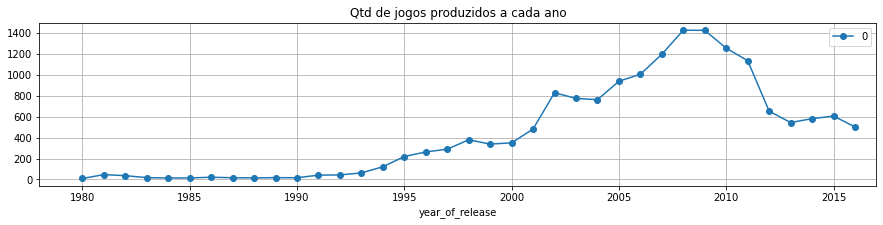

In [108]:
df_games_year.plot(title = 'Qtd de jogos produzidos a cada ano', x= 'year_of_release', xlim = (1978, 2017), style='o-', grid = True, figsize = (15,3))


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente gráfico
</div>

Quanto a produção de novos jogos, observamos que a mesma obteve um aumento expressivo do seu volume após o ano 2000, atingindo o seu pico no final dos anos 2000 e início dos anos 10. Após isso ocorreu uma queda na produção


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Vendas por plataforma

In [109]:
#Verificando total de vendas por plataforma
df_games_platform = df_games.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum')
df_games_platform.sort_values('total_sales')

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.81
DC,15.68
GEN,29.80



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [110]:
#Verificando total de vendas de cada plataforma em cada ano
df_games_platform = df_games.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
df_games_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
0,10.43,NaN,1.10,NaN,3.12,0.99,4.85,2.15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.97,NaN,9.30,5.93,NaN
1980,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O ideal é um gráfico de linhas
</div>

Observando os dados de cada plataforma, vemos que as mesmas atigem o seu pico de vendas em uma média de 5 anos após o lançamento da mesmas. Logo, para este estudo será considerado apenas jogos e plataformas com até 3 anos de lançamento. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Plataformas mais lucrativas nos dias atuais

In [111]:
# Fatiando os dados a serem utilizados
df_games_final = df_games.query('year_of_release >= 2013')
df_games_final.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [112]:
#Verificando a quatindade total de vendas por plataforma
df_games_final_pv = df_games_final.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum')
df_games_final_pv.sort_values('total_sales')

,total_sales
platform,
DS,1.42
PSP,3.46
Wii,12.54
PSV,29.73
PC,36.47
WiiU,59.94
X360,124.69
3DS,136.97
XOne,145.05



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='platform'>

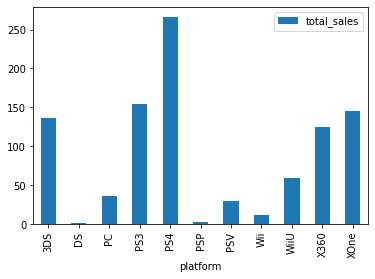

In [113]:
df_games_final_pv.plot(kind = 'bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ótimo
</div>

In [114]:
# Verificando o total de vendas, 2103 a 2016, das plataformas filtradas
df_games_final_pv = df_games_final.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
df_games_final_pv

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,53.97,1.42,11.27,95.85,22.12,3.10,9.14,7.87,20.12,80.82,17.21
2014,41.75,NaN,12.38,40.88,84.22,0.24,10.56,3.45,20.35,31.61,49.26
2015,26.75,NaN,7.93,14.70,100.44,0.12,5.93,1.05,15.22,10.86,54.67
2016,14.50,NaN,4.89,3.23,59.01,NaN,4.10,0.17,4.25,1.40,23.91


Tendo como base os dados filtrados, podemos observar alguns fatos:

    - Algumas plataformas já chegaram ao fim da sua vida (DS e PSP);
    - Algumas plataformas estão em declinio, o que pode representar poucas vendas no ano de 2017 (PS3, PSV, Wii, WiiU e X360);
    - A plataforma 3DS apesar de estar com suas vendas em declínio ainda possuem volumes significativos;
    - Apesar da plataforma de PC está com as vendas em queda, não pode ser ignorada pelo fato de, ao contrário das demais, ser uma plataforma com alta capacidade de atualização. 

Levando em consideração, para os estudos finais, manteremos apenas as plataformas 3DS, PC, PS4 e XOne.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Gostei das conclusões. 
</div>

In [115]:
df_games_final = df_games_final.query('platform == "3DS" or platform == "PC" or platform == "PS4" or platform == "XOne" and year_of_release > 2012')
df_games_final.head().reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,10.94
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [116]:
df_games_final_pv = df_games_final.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum')
df_games_final_pv

,total_sales
platform,
3DS,136.97
PC,36.47
PS4,265.79
XOne,145.05



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

(0.0, 300.0)

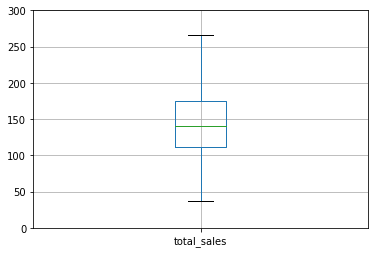

In [117]:
# Criando diagrama de caixa
df_games_final_pv.boxplot()
plt.ylim(0,300)

Pode-se observar que na soma das vendas dos ultimos anos, a plataforma PS4 se sobressai com o maior número de vendas (265.79 milhões) , seguida por XOne (145.05 milhões) e 3DS(136,97 milhões), por último, temos o PC com somente 36,47 milhões de vendas. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Relação avaliações dos jogos x total de vendas no PS4

In [118]:
#Separando os jogos da plataforma PS4
df_games_ps4 = df_games_final.query('platform == "PS4"')
df_games_ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,6.04
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,5.18
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,4.72
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,4.54



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

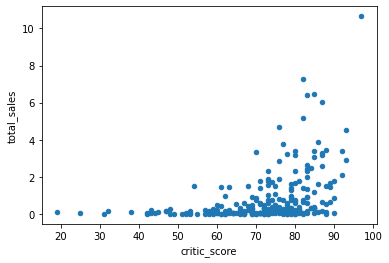

In [119]:
#gráfico de dispersão critic_score x total_sales
df_games_ps4.plot(x='critic_score', y='total_sales', kind ='scatter')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

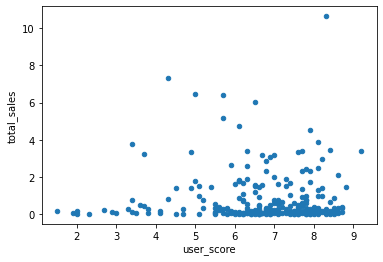

In [120]:
#gráfico de dispersão user_score x total_sales
df_games_ps4.plot(x='user_score', y='total_sales', kind ='scatter')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se nos gráficos acima que quanto melhor a avalição do jogo mais provável que os números de vendas sejam altos.
Duas questões devem ser observadas:
    
    1. Na relação critic_score x total_sale não existem jogos com notas baixas e grande volumes de vendas;
    2. Na relação user_score x total_sale já existem alguns jogos que apesar da avaliação baixa, teve um volume de vendas expressivo. 


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

E se você avaliar a corelação de Pearson usando cor()?
</div>

#### Comparando as vendas dos jogos em outras plataformas

In [121]:
df_games_COD = df_games_final.query('name == "Call of Duty: Black Ops 3" or name == "FIFA 16"')
df_games_COD.reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
2,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,6.71
3,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.01
4,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,NaN,0.25
5,FIFA 16,PC,2015,Sports,0.06,0.13,0.00,0.01,81.0,4.4,E,0.19


Buscando dois exemplos de jogos, Call of Duty: Black Ops 3 e FIFA 16, pode-se observar que nos dois casos as vendas dos jogos variam muito de plataforma para plataforma, Sendo a plataforma PS4 a mais popular, seguida da XOne, e tendo a PC com poucas vendas.


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ausente. Acho que você se esqueceu. Sugiro escolher um jogo (ex: God of War) e comparar.
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Vendas por gênero de jogo

In [122]:
df_games_genre = df_games_final.pivot_table(index='genre', values = 'total_sales', aggfunc = 'sum')
df_games_genre.sort_values('total_sales')

,total_sales
genre,
Puzzle,1.69
Strategy,6.72
Adventure,11.56
Platform,15.66
Fighting,17.33
Simulation,18.31
Racing,20.22
Misc,21.19
Sports,74.69



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='genre'>

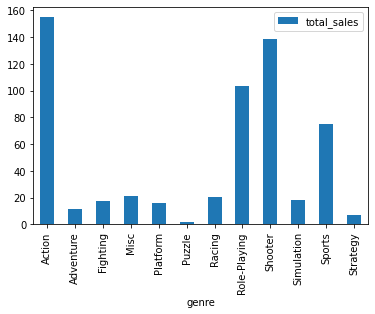

In [123]:
df_games_genre.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que os jogos do gênero Action (154.86 milhões), Shooter (138.56 milhões) e Role-Playing (103.49 milhões) são os mais populares. Já os gêneros Puzzle (1.69 milhões), Strategy (6.72 milhões) e Adventure (11.56 milhões) são os menos populares. 

### Criar perfil de usuário por região 

#### Plataforma

##### América do Norte

In [124]:
df_games_plataform_na = df_games.query('year_of_release >= 2013')
df_games_plataform_na = df_games_plataform_na.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum')
df_games_plataform_na.sort_values('na_sales')

,na_sales
platform,
PSP,0.00
DS,0.57
PSV,5.04
Wii,6.56
PC,11.11
WiiU,29.21
3DS,38.20
PS3,63.50
X360,81.66



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='platform'>

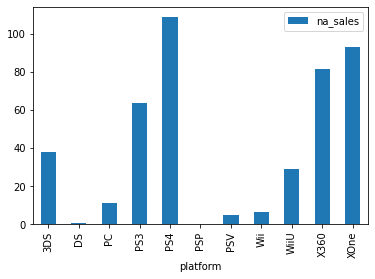

In [125]:
df_games_plataform_na.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região da America do Norte, as principais plataformas em número de vendas de 2013 até o momento são:
    
    1. PS4: 108,74 milhões;
    2. XOne: 93.12 milhões;
    3. X360: 81.66 milhões;
    4. PS3: 63.50 milhões;
    5. 3DS: 38.20 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Europa

In [126]:
df_games_plataform_eu = df_games.query('year_of_release >= 2013')
df_games_plataform_eu = df_games_plataform_eu.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum')
df_games_plataform_eu.sort_values('eu_sales')

,eu_sales
platform,
PSP,0.17
DS,0.85
Wii,5.93
PSV,6.10
WiiU,19.85
PC,25.36
3DS,30.96
X360,42.52
XOne,51.59



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='platform'>

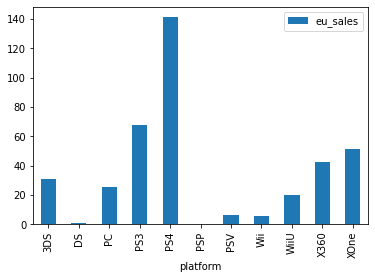

In [127]:
df_games_plataform_eu.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região da Europa, as principais plataformas em número de vendas de 2013 até o momento são:

    1. PS4: 141.09 milhões;
    2. PS3: 67.81 milhões;
    3. XOne: 51.59 milhões;
    4. X360: 42.52 milhões;
    5. 3DS: 30.96 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Japão

In [128]:
df_games_plataform_jp = df_games.query('year_of_release >= 2013')
df_games_plataform_jp = df_games_plataform_jp.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum')
df_games_plataform_jp.sort_values('jp_sales')

,jp_sales
platform,
DS,0.00
PC,0.00
Wii,0.05
XOne,0.34
X360,0.51
PSP,3.29
WiiU,10.88
PS4,15.96
PSV,18.59



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='platform'>

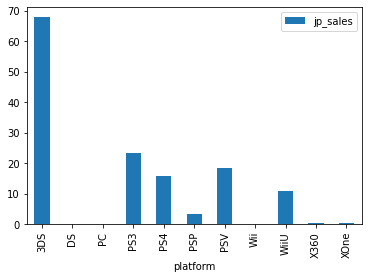

In [129]:
df_games_plataform_jp.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região do Japão, as principais plataformas em número de vendas de 2013 até o momento são:

    1. 3DS: 67.81 milhões;
    2. PS3: 23.35 milhões;
    3. PSV: 18.59 milhões;
    4. PS4: 15.96 milhões;
    5. WIIU: 10.88 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Gênero

##### América do Norte

In [130]:
df_games_plataform_na = df_games.query('year_of_release >= 2013')
df_games_plataform_na = df_games_plataform_na.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum')
df_games_plataform_na.sort_values('na_sales')

,na_sales
genre,
Puzzle,0.83
Strategy,3.28
Simulation,4.86
Adventure,7.14
Racing,12.96
Fighting,15.55
Platform,18.14
Misc,27.49
Role-Playing,46.40



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='genre'>

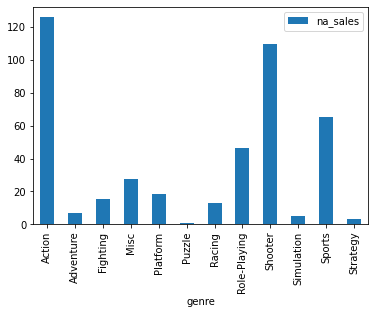

In [131]:
df_games_plataform_na.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região da America do Norte, as principais gêneros em número de vendas de 2013 até o momento são:
    
    1. Action: 126.05 milhões;
    2. Shooter: 109.74 milhões;
    3. Sports: 65.27 milhões;
    4. Role-Playing: 46.40 milhões;
    5. Misc: 27.49 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Europa

In [132]:
df_games_plataform_eu = df_games.query('year_of_release >= 2013')
df_games_plataform_eu = df_games_plataform_eu.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum')
df_games_plataform_eu.sort_values('eu_sales')

,eu_sales
genre,
Puzzle,1.00
Strategy,4.22
Adventure,8.25
Fighting,8.55
Simulation,10.92
Platform,15.58
Misc,20.04
Racing,20.19
Role-Playing,36.97



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='genre'>

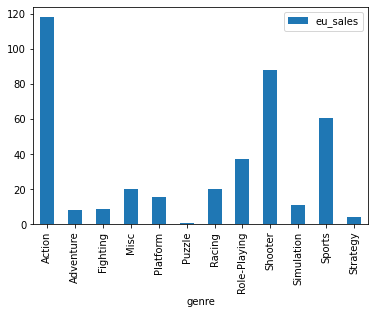

In [133]:
df_games_plataform_eu.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região da Europa, as principais gêneros em número de vendas de 2013 até o momento são:

    1. Action: 118.13 milhões;
    2. Shooter: 87.86 milhões;
    3. Sports: 60.52 milhões;
    4. Role-Playing: 36.97 milhões;
    5. Racing: 20.19 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Japão

In [134]:
df_games_plataform_jp = df_games.query('year_of_release >= 2013')
df_games_plataform_jp = df_games_plataform_jp.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum')
df_games_plataform_jp.sort_values('jp_sales')

,jp_sales
genre,
Puzzle,1.18
Strategy,1.77
Racing,2.30
Simulation,4.52
Platform,4.79
Sports,5.41
Adventure,5.82
Shooter,6.61
Fighting,7.65



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='genre'>

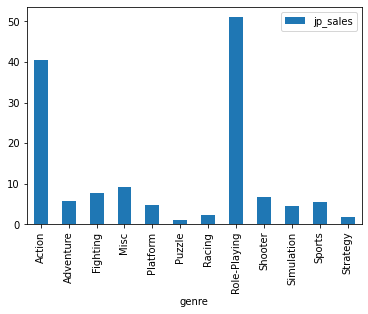

In [135]:
df_games_plataform_jp.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que na região do Japão, as principais plataformas em número de vendas de 2013 até o momento são:

    1. Role-Playing: 51.04 milhões;
    2. Action: 40.49 milhões;
    3. Misc: 9.20 milhões;
    4. Fighting: 7.65 milhões;
    5. Shooter: 6.61 milhões;


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Classificação ESRB

In [136]:
df_games_ESRB = df_games.query('year_of_release >= 2013')
df_games_ESRB = df_games_ESRB.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
df_games_ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<AxesSubplot:xlabel='rating'>

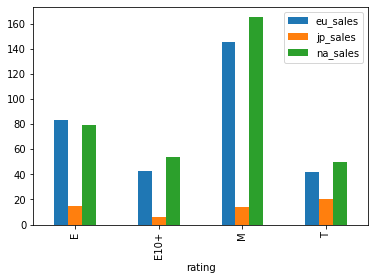

In [137]:
df_games_ESRB.plot(kind='bar')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Observa-se que a classificação ESRB influência as vendas dependendo da região. A América do Norte e a Europa possuem um comportamento bem parecido, tendo o a clssificação M como a mais vendidas seguidas pela E, E10+ e T. Já o Japão se difere tendo a T como a mais vendida seguida pela E, M e por último E10+.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Teste de Hipótese

#### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Para avaliar se podemos prever que as médias dos usuários das plataformas Xbox One e PC serão as mesmas utilizaremos a técnica de Hipóteses bicaudais onde: 
    
    - Hipótese nula = As médias dos usuários para os jogos nas duas plataformas são as mesmas;
    - Hipótese alternativa = Não podemos afirmar que as médias dos usuários para os jogos nas duas plataformas são as mesmas;


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não compreendi esses termos 'Hipótese nula rejeitada' e 'Hipótese nula não rejeitada'. Nesta parte, você deve apenas declarar: Hipótese nula: as médias ... são iguais, Hipótese alternativa: as médias ... naõ são iguais
    
A rejeição pode ocorrer após a realização do teste. Entende?     
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [138]:
df_games_pc = df_games.loc[df_games['platform'] == 'PC']
df_games_xbox_one = df_games.loc[df_games['platform'] == 'XOne']


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [139]:
alpha = 0.05

results = st.ttest_ind(df_games_pc['user_score'], df_games_xbox_one['user_score'], equal_var = False, nan_policy = 'omit')

print('p-value:', results.pvalue)
print('alpha:', alpha)

if results.pvalue < alpha:
    print('Nós rejeitamos a hipótese nula')
else:
    print('Nós não podemos rejeitar a hipótese nula')

p-value: 4.935072360183565e-06
alpha: 0.05
Nós rejeitamos a hipótese nula



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A hipótese nula foi rejeitada, logo, podemos afirmar que as médias dos usuários para os jogos nas duas plataformas são as mesmas.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Para avaliar se podemos prever que as médias dos usuários dos gêneros Action e Sports serão as mesmas utilizaremos a técnica de Hipóteses bicaudais onde:

- Hipótese nula - As médias dos usuários para os gêneros Action e Sports serão as mesmas;
- Hipótese alternativa - Não podemos afirmar que as médias dos usuários para os gêneros Action e Sports serão as mesmas;


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não compreendi esses termos 'Hipótese nula rejeitada' e 'Hipótese nula não rejeitada'. Nesta parte, você deve apenas declarar: Hipótese nula: as médias ... são iguais, Hipótese alternativa: as médias ... naõ são iguais
    
A rejeição pode ocorrer após a realização do teste. Entende?     
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [140]:
df_games_action = df_games.loc[df_games['genre'] == 'Action']
df_games_sports = df_games.loc[df_games['genre'] == 'Sports']

In [141]:
alpha = 0.05

results = st.ttest_ind(df_games_action['user_score'], df_games_sports['user_score'], equal_var = False, nan_policy = 'omit')

print('p-value:', results.pvalue)
print('alpha:', alpha)

if results.pvalue < alpha:
    print('Nós rejeitamos a hipótese nula')
else:
    print('Nós não podemos rejeitar a hipótese nula')

p-value: 0.11483818791498648
alpha: 0.05
Nós não podemos rejeitar a hipótese nula



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Neste caso a Hipótese nula não pode ser rejeitada, logo, não podemos afirmar que as médias dos usuários para os gêneros Action e Sports serão as mesmas.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Conclusão

Ao fim deste estudo conclui-se que:

    1- Quanto a produção de novos jogos, observa0-se que a mesma obteve um aumento expressivo do seu volume após o ano 2000, atingindo o seu pico no final dos anos 2000 e inicio dos anos 10. Após este periódo ocorreu uma queda no número de jogos lançados ano a ano;
    2- Observando os dados de cada plataforma, vemos que as mesmas atigem o seu pico de vendas em uma média de 5 anos após o lançamento da mesmas. Logo, para este estudo será considerado apenas jogos e plataformas com até 3 anos de lançamento;
    3- Pode-se observar que na soma das vendas dos ultimos anos, a plataforma PS4 se sobressai com o maior número de vendas (265.79 milhões) , seguida por XOne (145.05 milhões) e 3DS(136,97 milhões), por último, temos o PC com somente 36,47 milhões de vendas. 
    4- Na relação critic_score x total_sale não existem jogos com notas baixas e grande volumes de vendas;
    5- Na relação user_score x total_sale já existem alguns jogos que apesar da avaliação baixa, teve um volume de vendas expressivo. 
    6- Em relação as vendas totais observa-se que os jogos do gênero Action (154.86 milhões), Shooter (138.56 milhões) e Role-Playing (103.49 milhões) são os mais populares. Já os gêneros Puzzle (1.69 milhões), Strategy (6.72 milhões) e Adventure (11.56 milhões) são os menos populares.
    7- Na região da America do Norte, as 5 principais plataformas em número de vendas de 2013 até o momento são nessa ordem PS4, XOne, X360, PS3 e 3DS. Sendo os jogos de Action, Shooter e Sports os 3 gêneros mais vendidos;
    8- Na região da Europa, as 5 principais plataformas em número de vendas de 2013 até o momento são nessa ordem PS4, PS3, XOne, X360 e 3DS. Sendo os jogos de Action, Shooter e Sports os 3 gêneros mais vendidos.
    9- Na região do Japão, as 5 principais plataformas em número de vendas de 2013 até o momento são nessa ordem 3DS, PS3, PSV, PS4, WIIU. Sendo os jogos de Role-Playing, Action e Misc os 3 gêneros mais vendidos.
    10- Observa-se que a classificação ESRB influência as vendas dependendo da região, a América do Norte e a Europa possuem um comportamento bem parecido, tendo o a clssificação M como a mais vendidas seguidas pela E, E10+ e T. Já o Japão se difere tendo a T como a mais vendida seguida pela E, M e por último E10+.
    11- Observa-se que o desempenho das vendas de um jogo varia de acordo com a plataforma, nos dados observados os jogos possuem um maior número de vendas no PS4, seguido do XOne 
    
Quanto as hipóteses trabalhadas conclui-se que:

    1 - Que as médias dos usuários para os jogos nas plataformas de PC e Xbox One serão as mesmas.
    2 - Que não podemos afirmar que as médias dos usuários para os gêneros Action e Sports serão as mesmas.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Adicionar a parte ausente </span>
 * <span class="text-danger"> Ajustar a redação do teste de hipótese </span>

Portanto, sugiro que você corrija os pontos indicados. Caso você tenha alguma dúvida, não hesite em me contactar.
    
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>


Você fez todos os ajustes. Parabéns pelo trabalho. Como sugestão, sugiro ver alguns exemplos de como declarar as hipóteses nula e alternativas em livros de estatística.
    
Desejo sucesso.    
</div>